In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import abspath
import pandas as pd
import numpy as np
import os

In [2]:
save = True

savedir = abspath('./stimuli_csvs')
os.makedirs(savedir, exist_ok=True)

figdir = abspath('../fig')
os.makedirs(savedir, exist_ok=True)

In [3]:
conditions = ['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'lowPMI_random', 'backward', 'random', 'random_poscontrolled', 'random_withreplacement']

# Load and combine dataframes

In [4]:
print(os.getcwd())
d = pd.read_csv(os.path.join(savedir, "2_pPMI_lag2_Original.csv"), header=None)
d.columns = ["stimulus_id", "condition", "stimulus", "pPMI_lag2"]
d

/rdma/vast-rdma/vast/cpl/ckauf/perturbed-neural-nlp/analysis/pmi_verification


,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.084573
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.196020
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.417875
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.256986
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.073480
...,...,...,...,...
622,384sentences.379,Original,some windows have multiple panes to increase i...,1.195439
623,384sentences.380,Original,a woman is a female human adult.,1.100778
624,384sentences.381,Original,a woman is stereotypically seen as a caregiver.,1.387173
625,384sentences.382,Original,a woman can become pregnant and bear children.,1.362809


In [5]:
frames = []
for cond in conditions:
    for filename in os.listdir(savedir):
        if filename == "2_pPMI_lag2_{}.csv".format(cond):
            print(filename)
            d = pd.read_csv(os.path.join(savedir, "2_pPMI_lag2_{}.csv".format(cond)), header=None)
            d.columns = ["stimulus_id", "condition", "stimulus", "pPMI_lag2"]
            frames.append(d)
data = pd.concat(frames)

2_pPMI_lag2_Original.csv
2_pPMI_lag2_Scr1.csv
2_pPMI_lag2_Scr3.csv
2_pPMI_lag2_Scr5.csv
2_pPMI_lag2_Scr7.csv
2_pPMI_lag2_lowPMI.csv
2_pPMI_lag2_lowPMI_random.csv
2_pPMI_lag2_backward.csv
2_pPMI_lag2_random.csv
2_pPMI_lag2_random_poscontrolled.csv
2_pPMI_lag2_random_withreplacement.csv


In [6]:
data

,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.084573
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.196020
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.417875
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.256986
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.073480
...,...,...,...,...
622,384sentences.379,random_withreplacement,and the depending allow watching throwing ofte...,0.588688
623,384sentences.380,random_withreplacement,used things that connected and a to.,0.366521
624,384sentences.381,random_withreplacement,joined the the drunk the or have due.,0.453893
625,384sentences.382,random_withreplacement,controlled barrier butterfat on articles their...,0.693643


# Prepare plotting

In [7]:
ppmi_mean = list()
ppmi_mean_errors = list()

print(len(conditions))
for condition in conditions:
    #subset dataframe
    curr_df = data.loc[data['condition']==condition]
    print(condition)
    #calculate mean & std
    curr_mean = np.mean(list(curr_df['pPMI_lag2']))
    curr_std = np.std(list(curr_df['pPMI_lag2']))
    #save
    print(f'Mean pPMI: {curr_mean}')
    print(f'Std: {curr_mean}')
    print('\n')
    ppmi_mean.append(curr_mean)
    ppmi_mean_errors.append(curr_std)

11
Original
Mean pPMI: 1.363952620769578
Std: 1.363952620769578


Scr1
Mean pPMI: 1.3658914689458792
Std: 1.3658914689458792


Scr3
Mean pPMI: 1.3720619823033469
Std: 1.3720619823033469


Scr5
Mean pPMI: 1.3500014737816968
Std: 1.3500014737816968


Scr7
Mean pPMI: 1.3257100462960536
Std: 1.3257100462960536


lowPMI
Mean pPMI: 1.0011119004582103
Std: 1.0011119004582103


lowPMI_random
Mean pPMI: 0.828480191106345
Std: 0.828480191106345


backward
Mean pPMI: 1.3853526607985336
Std: 1.3853526607985336


random
Mean pPMI: 0.6391769676566947
Std: 0.6391769676566947


random_poscontrolled
Mean pPMI: 0.6579689479265434
Std: 0.6579689479265434


random_withreplacement
Mean pPMI: 0.6533287650131002
Std: 0.6533287650131002




# Plot

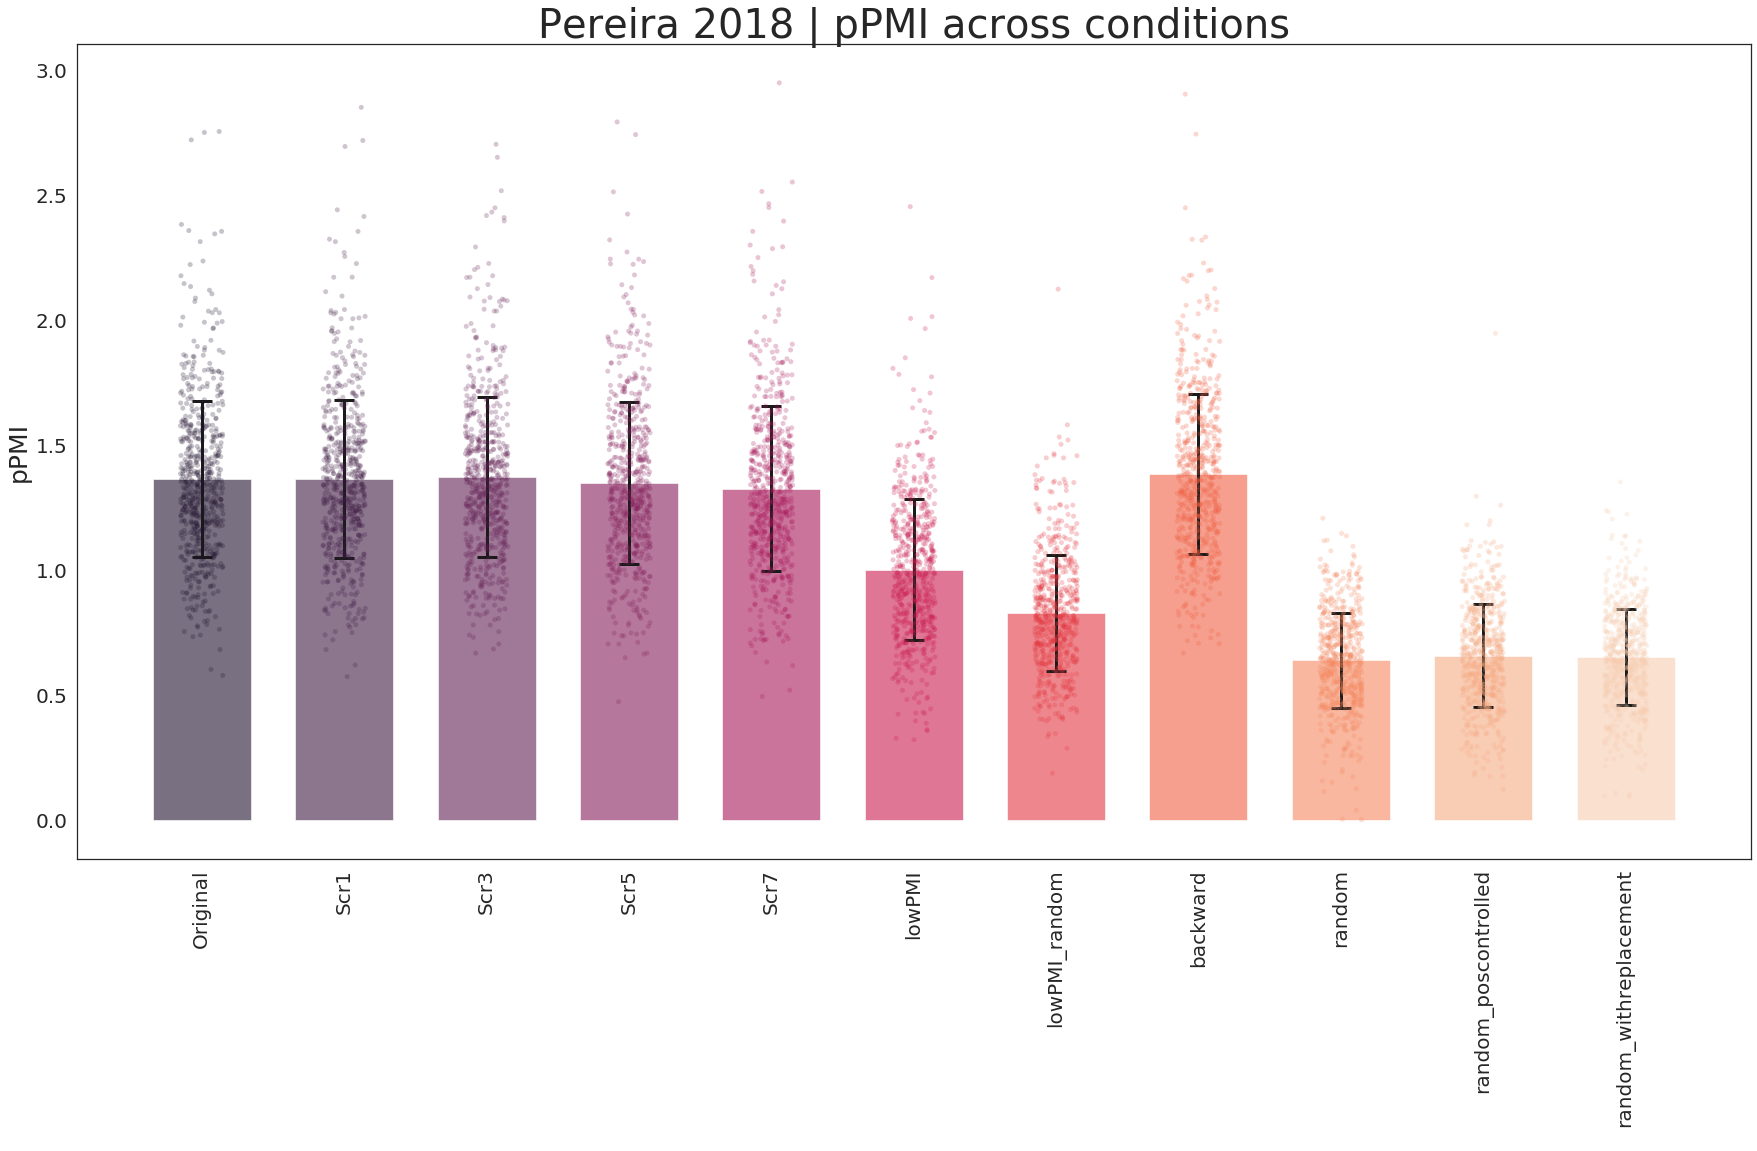

In [8]:
sns.set()
mypalette = sns.color_palette("rocket",11)
sns.set_palette(mypalette)
sns.set_style("white")

data_title='Pereira 2018 | pPMI across conditions'

fig_dims=(30,15)
fig, ax = plt.subplots(figsize=fig_dims)
capsize = 10

small_size = 40/2
medium_size = 50/2
title_size=80/2


sns.stripplot(x="condition", y="pPMI_lag2",data=data,alpha=0.25,palette = mypalette,dodge=True,ax=ax,jitter=0.15)
#space = np.linspace(-len(conditions)/2,len(conditions)/2,len(conditions))
width = (1/float(len(conditions)/10))/1.32
bar_ind = np.arange(len(conditions))
for ind, ppmi in enumerate(ppmi_mean):
    p1 = ax.bar(bar_ind[ind], ppmi, width,yerr=ppmi_mean_errors[ind], #edgecolor='black',
                error_kw=dict(lw=3, capsize=capsize, capthick=3), alpha = 0.6)

ax.set(ylabel='pPMI',xlabel=' ')
ax.yaxis.label.set_size(medium_size)
ax.set_title(data_title, fontsize=title_size) # Add the text/suptitle to figure
ax.tick_params(axis='x', labelsize=small_size, rotation=90)
ax.tick_params(axis='y', labelsize=small_size)

if save:
    plt.savefig(os.path.join(figdir,'pmi_verification_scr.png'), bbox_inches='tight')

# T-test

In [9]:
from scipy.stats import ttest_ind

cat1 = data[data['condition']=='Original']
cat2 = data[data['condition']=='Scr1']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=-0.10912825671391638, pvalue=0.9131182504846063)

In [10]:
cat1 = data[data['condition']=='Original']
cat2 = data[data['condition']=='Scr7']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=2.098941116142251, pvalue=0.036021947847504385)

In [11]:
cat1 = data[data['condition']=='Scr7']
cat2 = data[data['condition']=='lowPMI']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=18.668936764603373, pvalue=8.205843516805171e-69)

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. 

In [12]:
#!pip3 install scikit_posthocs

In [13]:
import scipy.stats as stats
import scikit_posthocs as sp

['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'lowPMI', 'lowPMI_random', 'backward', 'random', 'random_poscontrolled', 'random_withreplacement']
11
ANOVA F-statistic and p-value: (874.0814893854869, 0.0)
                        Original  Scr1  Scr3  Scr5  Scr7  lowPMI  \
Original                    -1.0   0.0   0.0   0.0   3.0     1.0   
Scr1                         0.0  -1.0   0.0   0.0   3.0     1.0   
Scr3                         0.0   0.0  -1.0   0.0   3.0     1.0   
Scr5                         0.0   0.0   0.0  -1.0   0.0     1.0   
Scr7                         3.0   3.0   3.0   0.0  -1.0     1.0   
lowPMI                       1.0   1.0   1.0   1.0   1.0    -1.0   
lowPMI_random                1.0   1.0   1.0   1.0   1.0     1.0   
backward                     0.0   0.0   0.0   0.0   2.0     1.0   
random                       1.0   1.0   1.0   1.0   1.0     1.0   
random_poscontrolled         1.0   1.0   1.0   1.0   1.0     1.0   
random_withreplacement       1.0   1.0   1.0   1.

,Original,Scr1,Scr3,Scr5,Scr7,lowPMI,lowPMI_random,backward,random,random_poscontrolled,random_withreplacement
Original,1.000000e+00,9.131183e-01,6.499031e-01,4.386671e-01,3.602195e-02,7.578712e-88,2.164314e-182,2.312861e-01,7.006122e-297,2.580684e-280,3.517822e-289
Scr1,9.131183e-01,1.000000e+00,7.307997e-01,3.795492e-01,2.818503e-02,5.353522e-88,5.042504e-182,2.781440e-01,8.470131e-296,2.268418e-279,3.860519e-288
Scr3,6.499031e-01,7.307997e-01,1.000000e+00,2.249330e-01,1.179437e-02,1.284689e-89,3.119297e-183,4.612057e-01,4.707971e-296,8.409247e-280,1.846136e-288
Scr5,4.386671e-01,3.795492e-01,2.249330e-01,1.000000e+00,1.899380e-01,1.355348e-79,7.137684e-170,5.201552e-02,4.752906e-281,3.658248e-265,1.745850e-273
Scr7,3.602195e-02,2.818503e-02,1.179437e-02,1.899380e-01,1.000000e+00,8.205844e-69,9.692530e-155,1.210219e-03,1.965690e-263,4.752365e-248,6.173111e-256
lowPMI,7.578712e-88,5.353522e-88,1.284689e-89,1.355348e-79,8.205844e-69,1.000000e+00,1.483808e-30,5.751486e-95,4.658949e-124,1.237811e-109,5.193198e-116
lowPMI_random,2.164314e-182,5.042504e-182,3.119297e-183,7.137684e-170,9.692530e-155,1.483808e-30,1.000000e+00,1.432688e-189,5.796373e-51,4.003712e-40,3.419573e-44
backward,2.312861e-01,2.781440e-01,4.612057e-01,5.201552e-02,1.210219e-03,5.751486e-95,1.432688e-189,1.000000e+00,2.376690e-302,4.486566e-286,8.579530e-295
random,7.006122e-297,8.470131e-296,4.707971e-296,4.752906e-281,1.965690e-263,4.658949e-124,5.796373e-51,2.376690e-302,1.000000e+00,9.297165e-02,1.905176e-01
random_poscontrolled,2.580684e-280,2.268418e-279,8.409247e-280,3.658248e-265,4.752365e-248,1.237811e-109,4.003712e-40,4.486566e-286,9.297165e-02,1.000000e+00,6.790732e-01


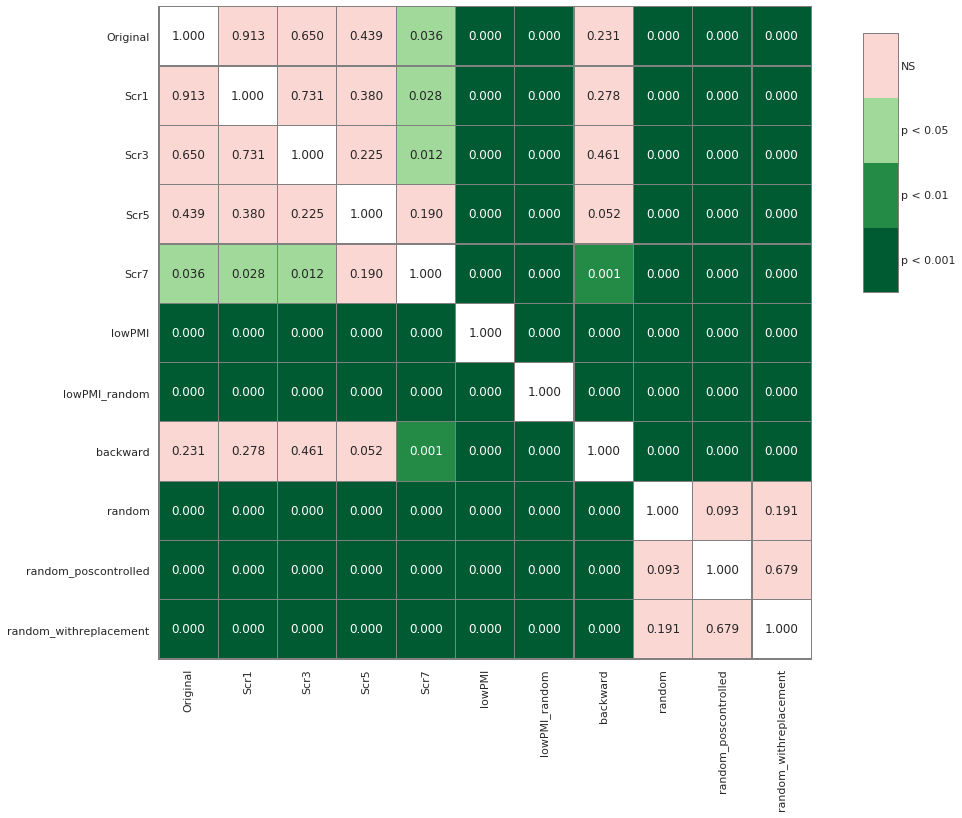

In [14]:
# Plot arguments
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.55, 0.04, 0.3]}

def anova_ttest():
    liste = []
    print(conditions)
    for condition in conditions:
        curr_df = data.loc[data['condition'] == condition]
        cat = np.array(curr_df['pPMI_lag2'])
        liste.append(cat)
    print(len(liste))
    F, p = stats.f_oneway(liste[0],liste[1],liste[2],liste[3],liste[4],liste[5],liste[6],
                         liste[7],liste[8],liste[9],liste[10])
    print(f'ANOVA F-statistic and p-value: {F,p}')
    
    ttest = sp.posthoc_ttest(data, val_col='pPMI_lag2', group_col='condition')#, p_adjust='fdr_bh')
    plt.figure(figsize=(12,12))
    sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
    #plt.title('Pereira 2018 | pPMI across conditions', fontsize=title_size)
    #plt.subplots_adjust(top=0.8) 
    
    if save:
        plt.savefig(os.path.join(figdir,'pmi_verification_scr_stats.png'), bbox_inches='tight')

    return ttest
anova_ttest()